# Results

## Import packages

In [1]:
from sklearn.tree import plot_tree
from sklearn.metrics import (
    PredictionErrorDisplay,
    root_mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
    r2_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os

In [2]:
CLEAN_DATA_FOLDER = "clean_data"
MODELS_FOLDER = "models"

In [3]:
results = {
    ("Train", "RMSE"): {},
    ("Train", "MAE"): {},
    ("Train", "EVS"): {},
    ("Train", "R2"): {},
    ("Test", "RMSE"): {},
    ("Test", "MAE"): {},
    ("Test", "EVS"): {},
    ("Test", "R2"): {},
}

## Load the dataframe

In [4]:
train_df = pd.read_csv(os.path.join(CLEAN_DATA_FOLDER, "train.csv"))
test_df = pd.read_csv(os.path.join(CLEAN_DATA_FOLDER, "test.csv")).sort_values(
    ["Day", "Line", "Service", "Direction Number", "Sequence"]
)

## Split into X and y

In [5]:
train_X = train_df[[x for x in train_df.columns if x not in ["On", "Off"]]]
train_y = train_df["On"]
test_X = test_df[[x for x in test_df.columns if x not in ["On", "Off"]]]
test_y = test_df["On"]

## ElasticNet

In [6]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "base_elastic_net.pkl"), "rb"))

In [7]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [8]:
model_name = "ElasticNet"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

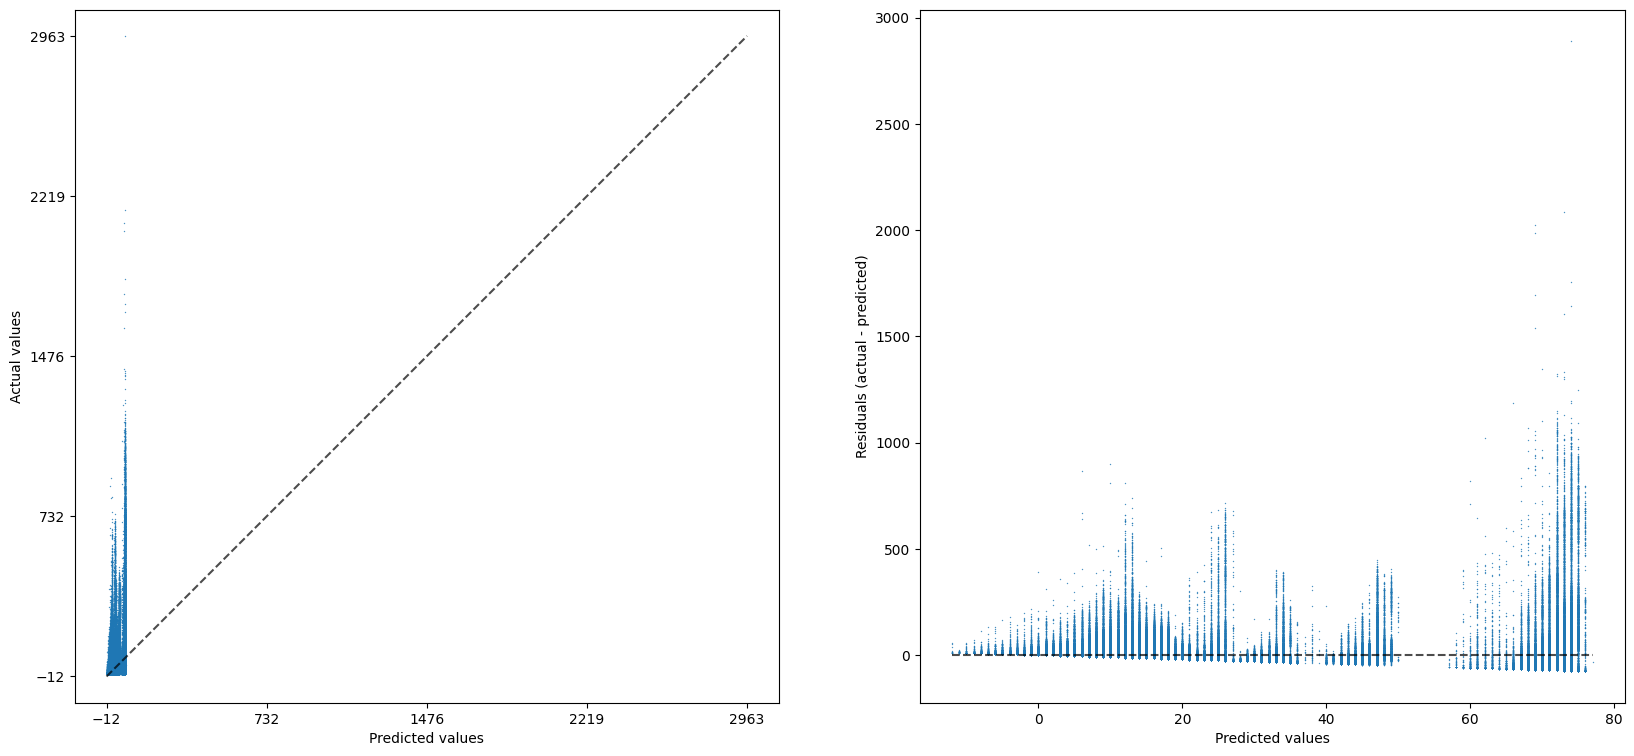

In [9]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

In [10]:
del model

## ElasticNet (tuned)

In [11]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "tuned_elastic_net.pkl"), "rb"))

In [12]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [13]:
model_name = "ElasticNet (tuned)"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

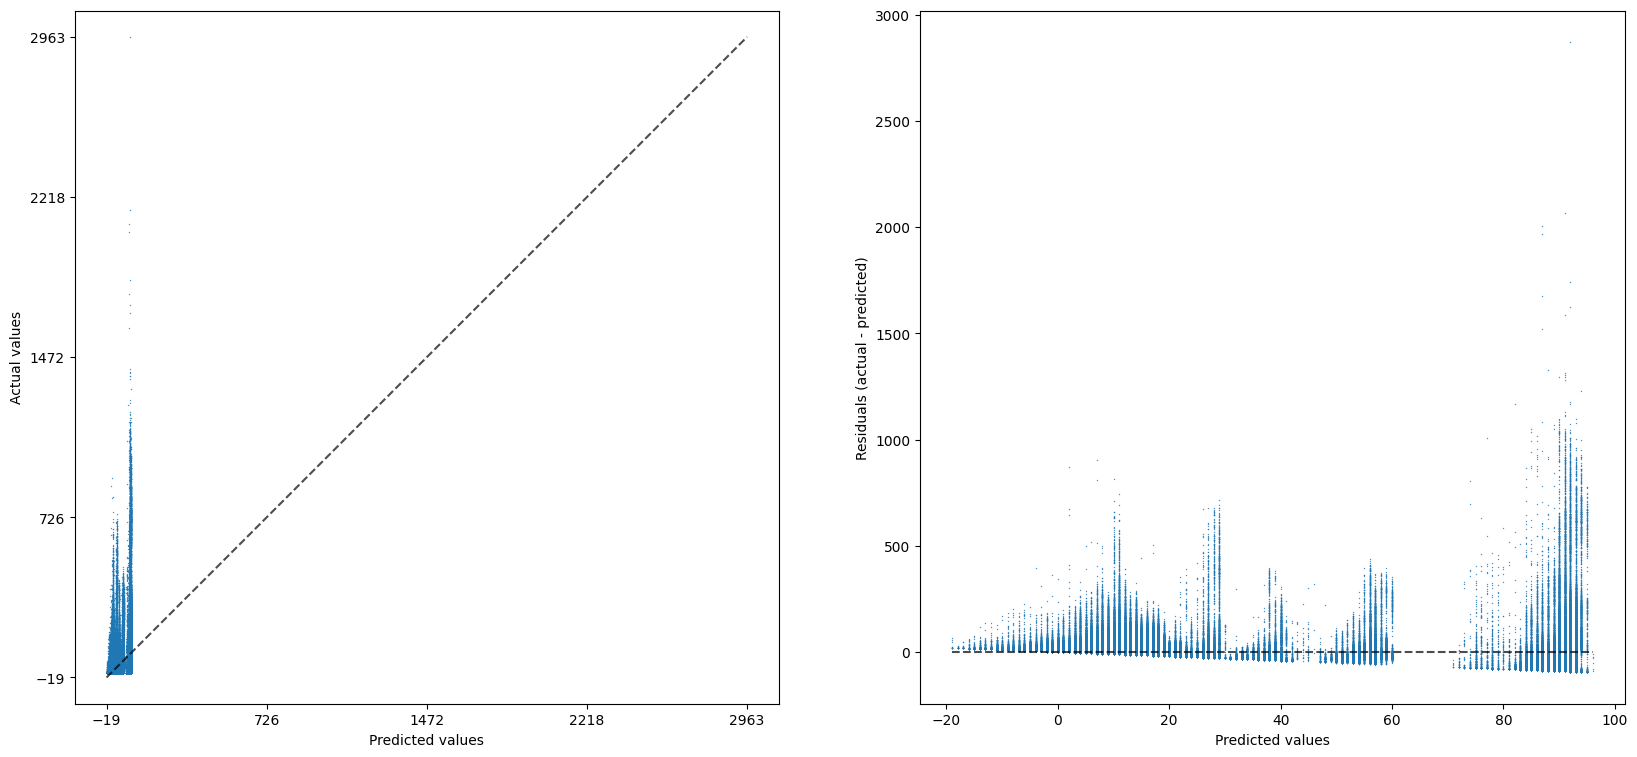

In [14]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

In [15]:
del model

## Decision Tree

In [16]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "base_decision_tree.pkl"), "rb"))

In [17]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [18]:
model_name = "Decision Tree"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

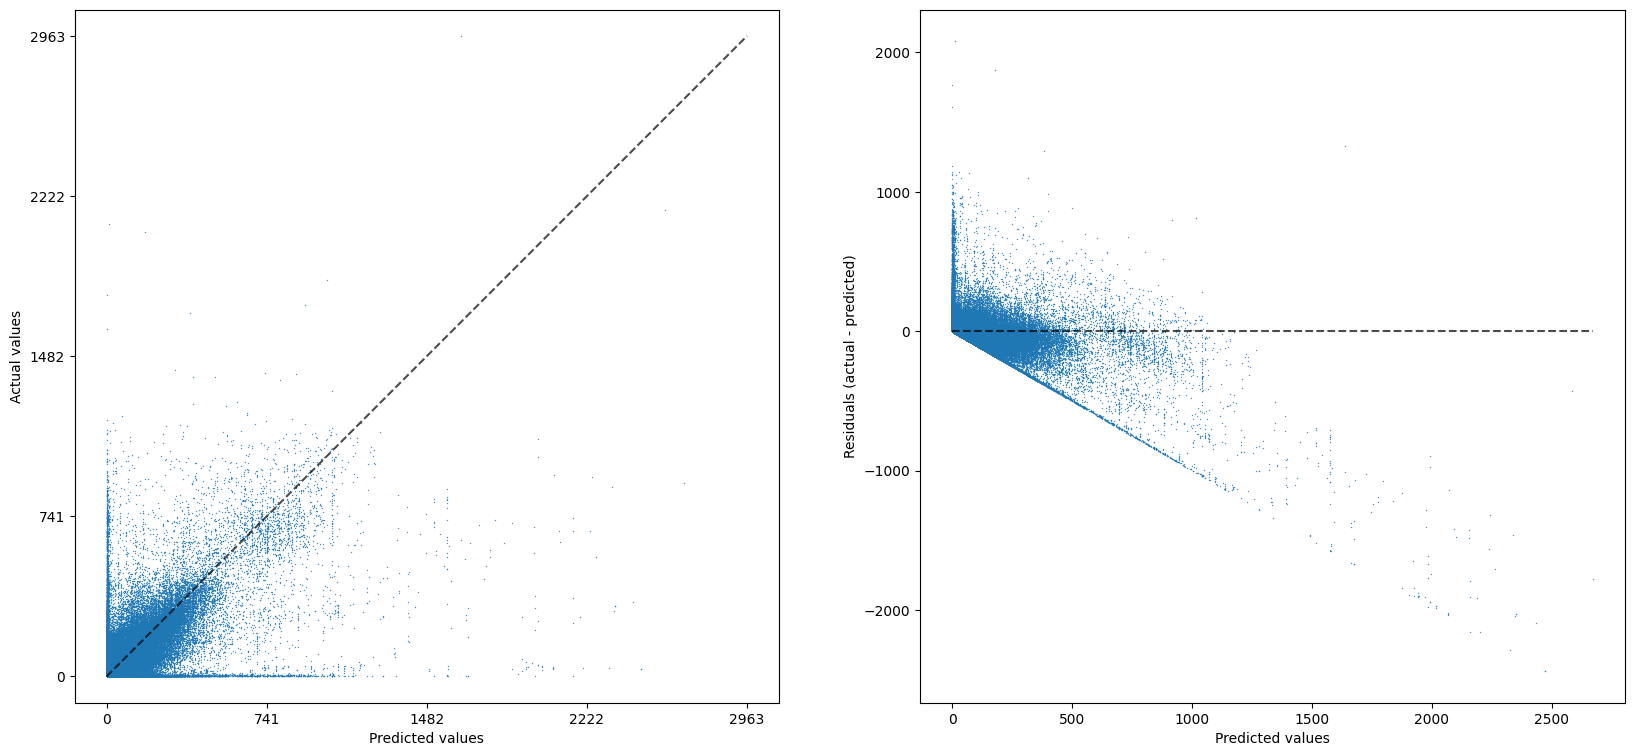

In [19]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

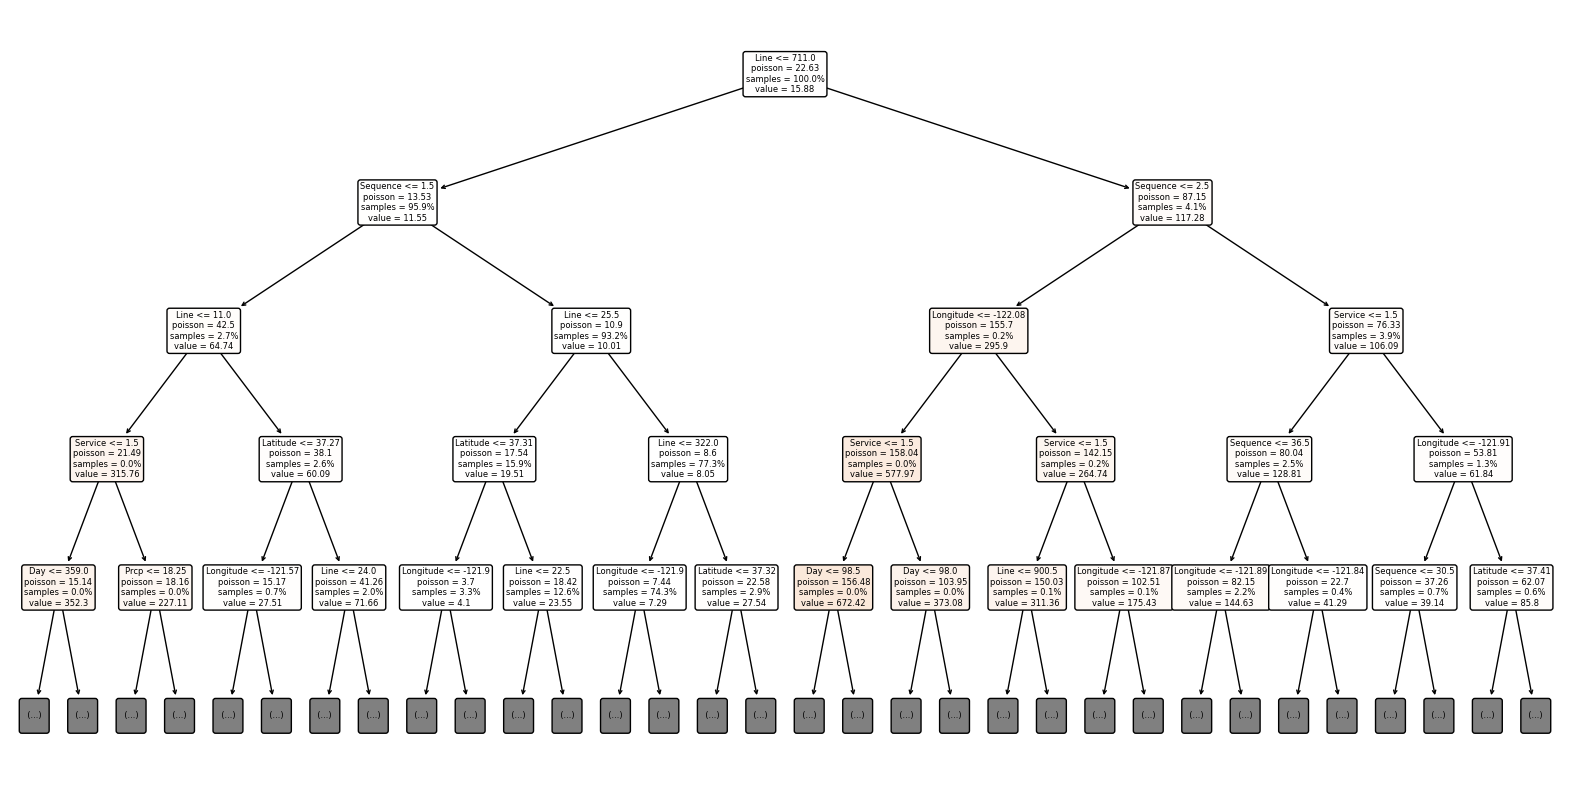

In [20]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
_ = plot_tree(
    model,
    max_depth=4,
    feature_names=train_X.columns,
    filled=True,
    proportion=True,
    rounded=True,
    precision=2,
    fontsize=6,
    ax=ax,
)

In [21]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Decision Tree Regressor")

In [22]:
del model

## Decision Tree (tuned)

In [23]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "tuned_decision_tree.pkl"), "rb"))

In [24]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [25]:
model_name = "Decision Tree (tuned)"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

In [26]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

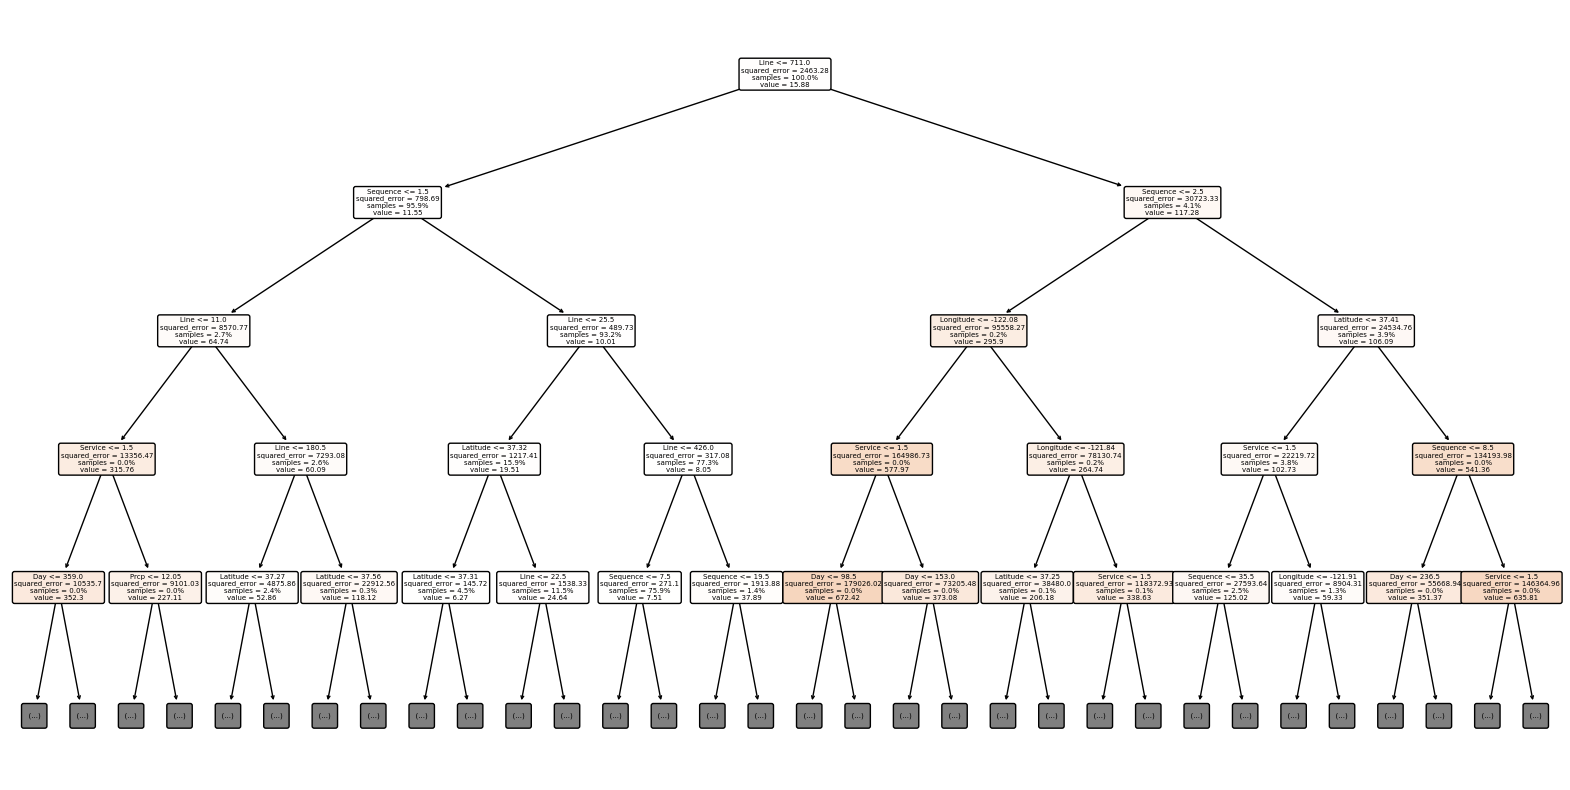

In [27]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
_ = plot_tree(
    model,
    max_depth=4,
    feature_names=train_X.columns,
    filled=True,
    proportion=True,
    rounded=True,
    precision=2,
    fontsize=5,
    ax=ax,
)

In [28]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Tuned Decision Tree Regressor")

In [29]:
del model

## Random Forest

In [30]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "base_random_forest.pkl"), "rb"))

In [31]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done  70 out of  70 | elapsed:    1.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done  70 out of  70 | elapsed:    0.4s finished


In [32]:
model_name = "Random Forest"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

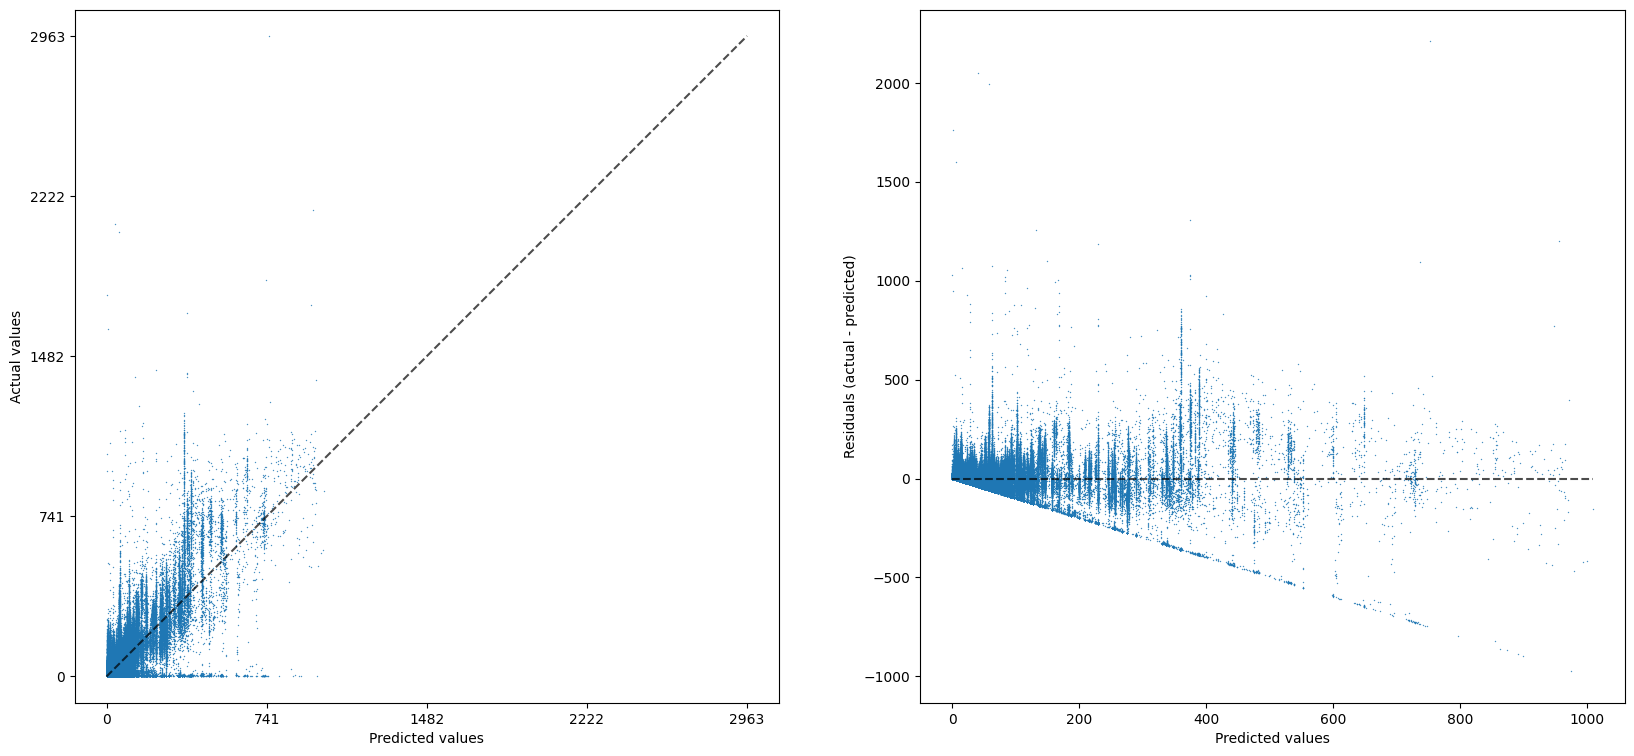

In [33]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

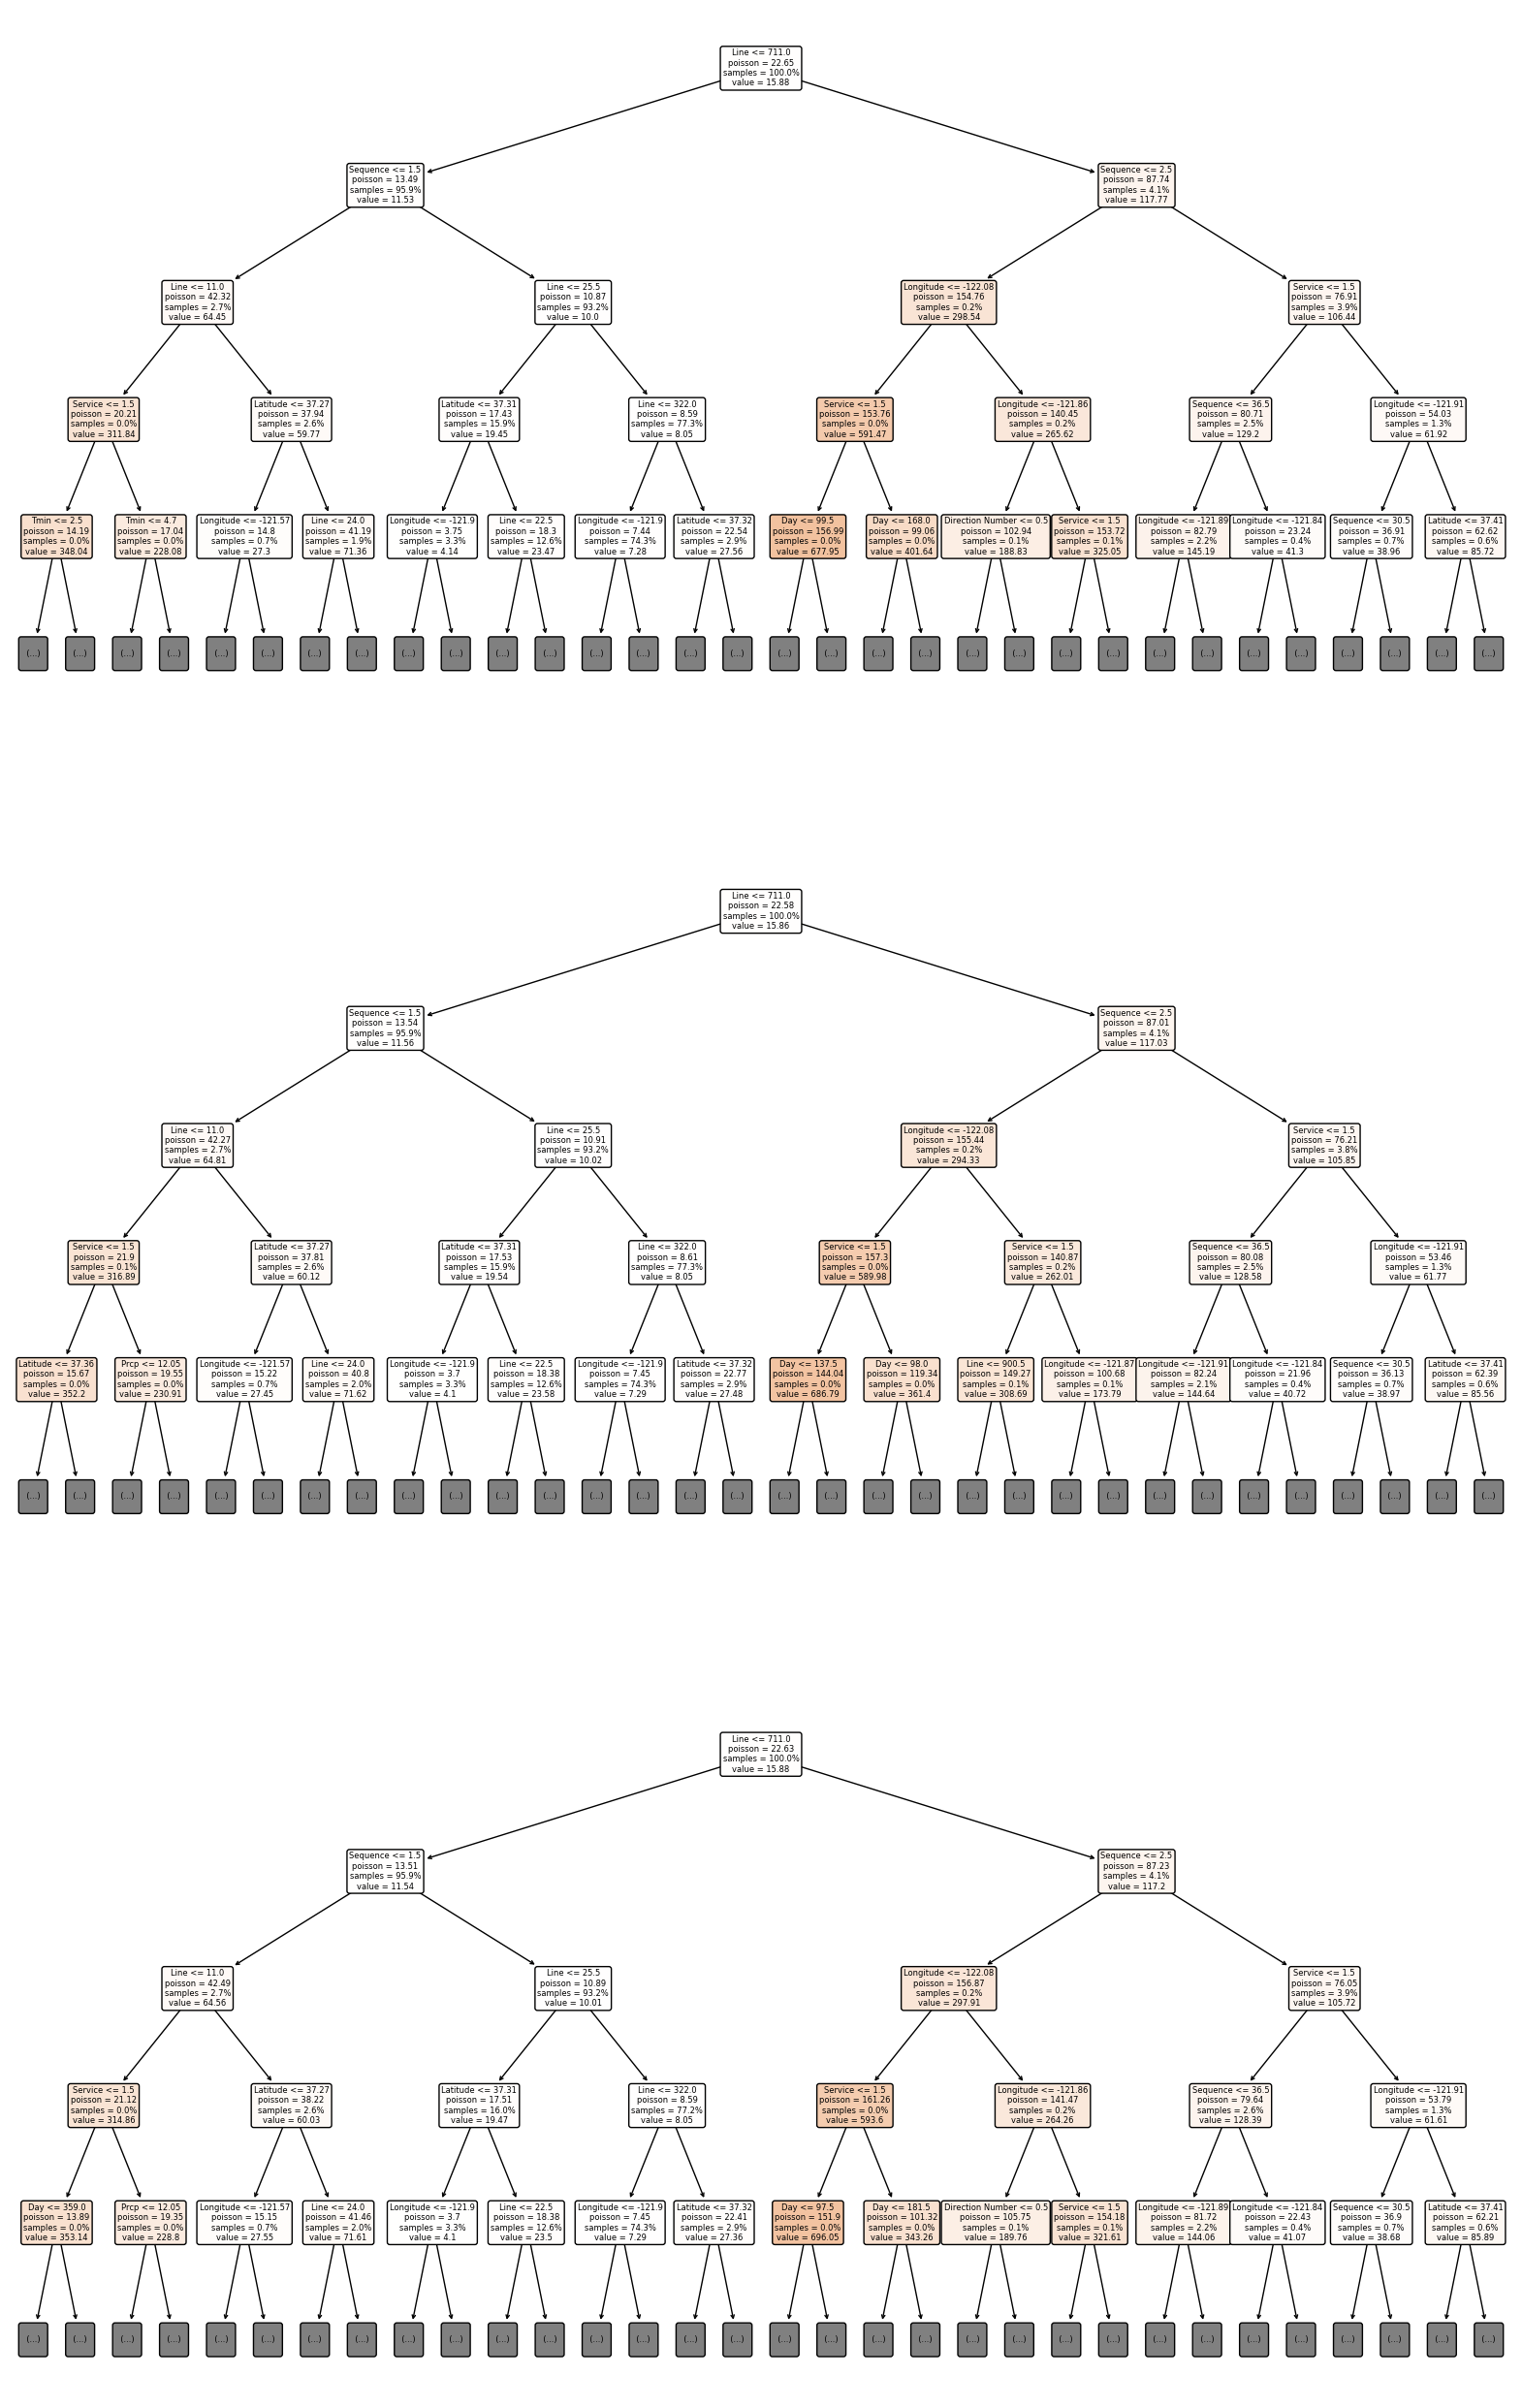

In [34]:
_, ax = plt.subplots(3, 1, figsize=(20, 32))
for i in range(3):
    _ = plot_tree(
        model.estimators_[i * len(model.estimators_) // 3],
        max_depth=4,
        feature_names=train_X.columns,
        filled=True,
        proportion=True,
        rounded=True,
        precision=2,
        fontsize=6,
        ax=ax[i],
    )

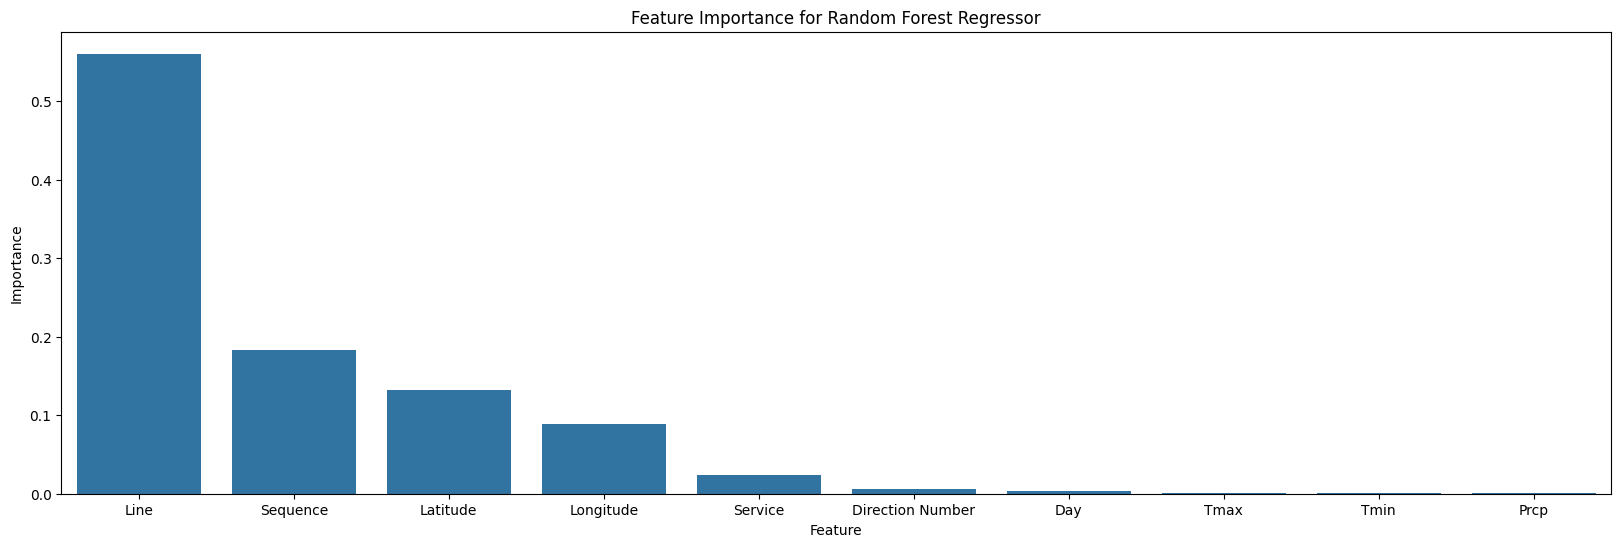

In [35]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Random Forest Regressor")

In [36]:
del model

## Random Forest (tuned)

In [37]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "tuned_random_forest.pkl"), "rb"))

In [38]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [39]:
model_name = "Random Forest (tuned)"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

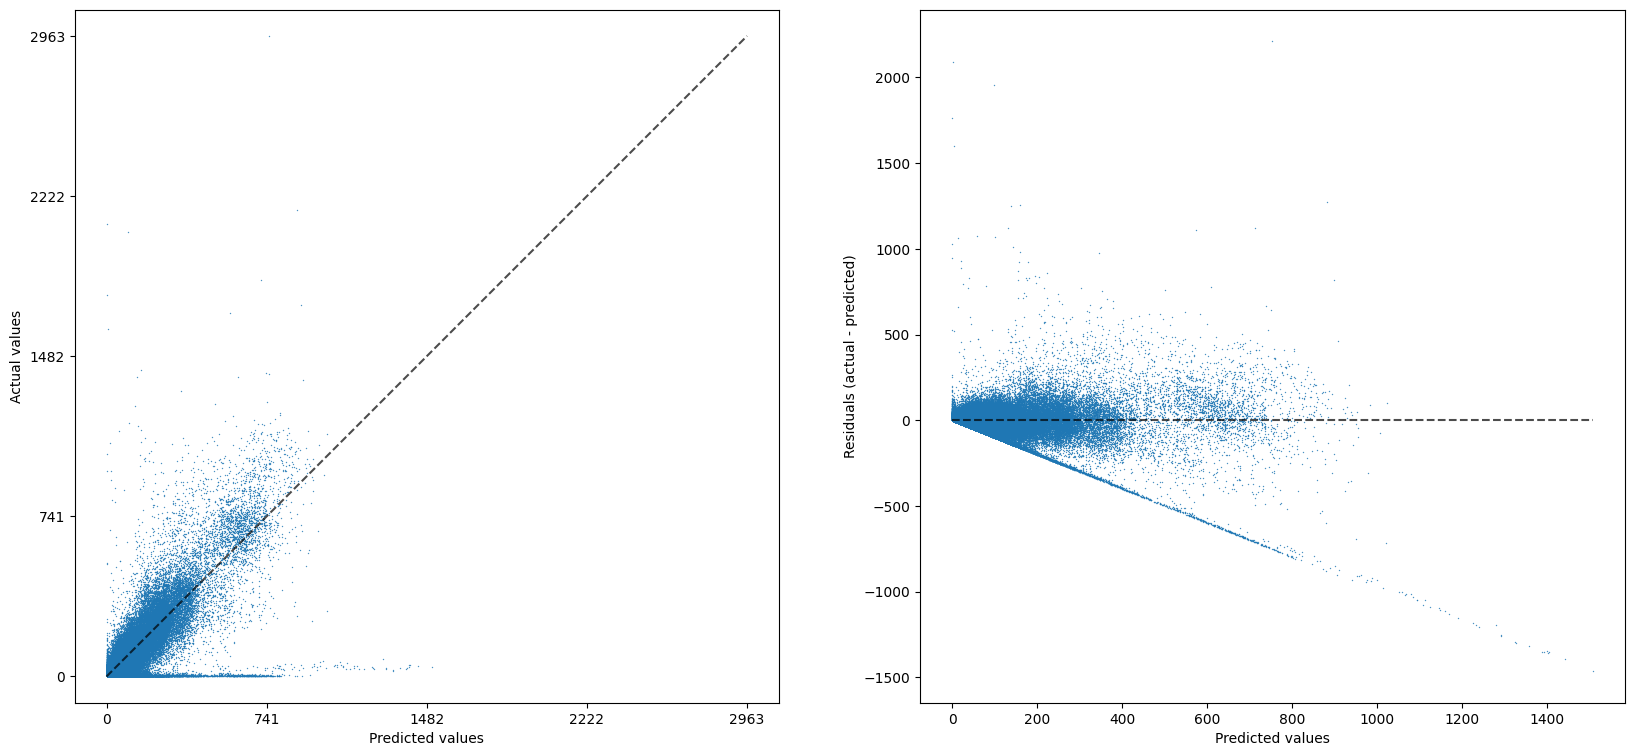

In [40]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

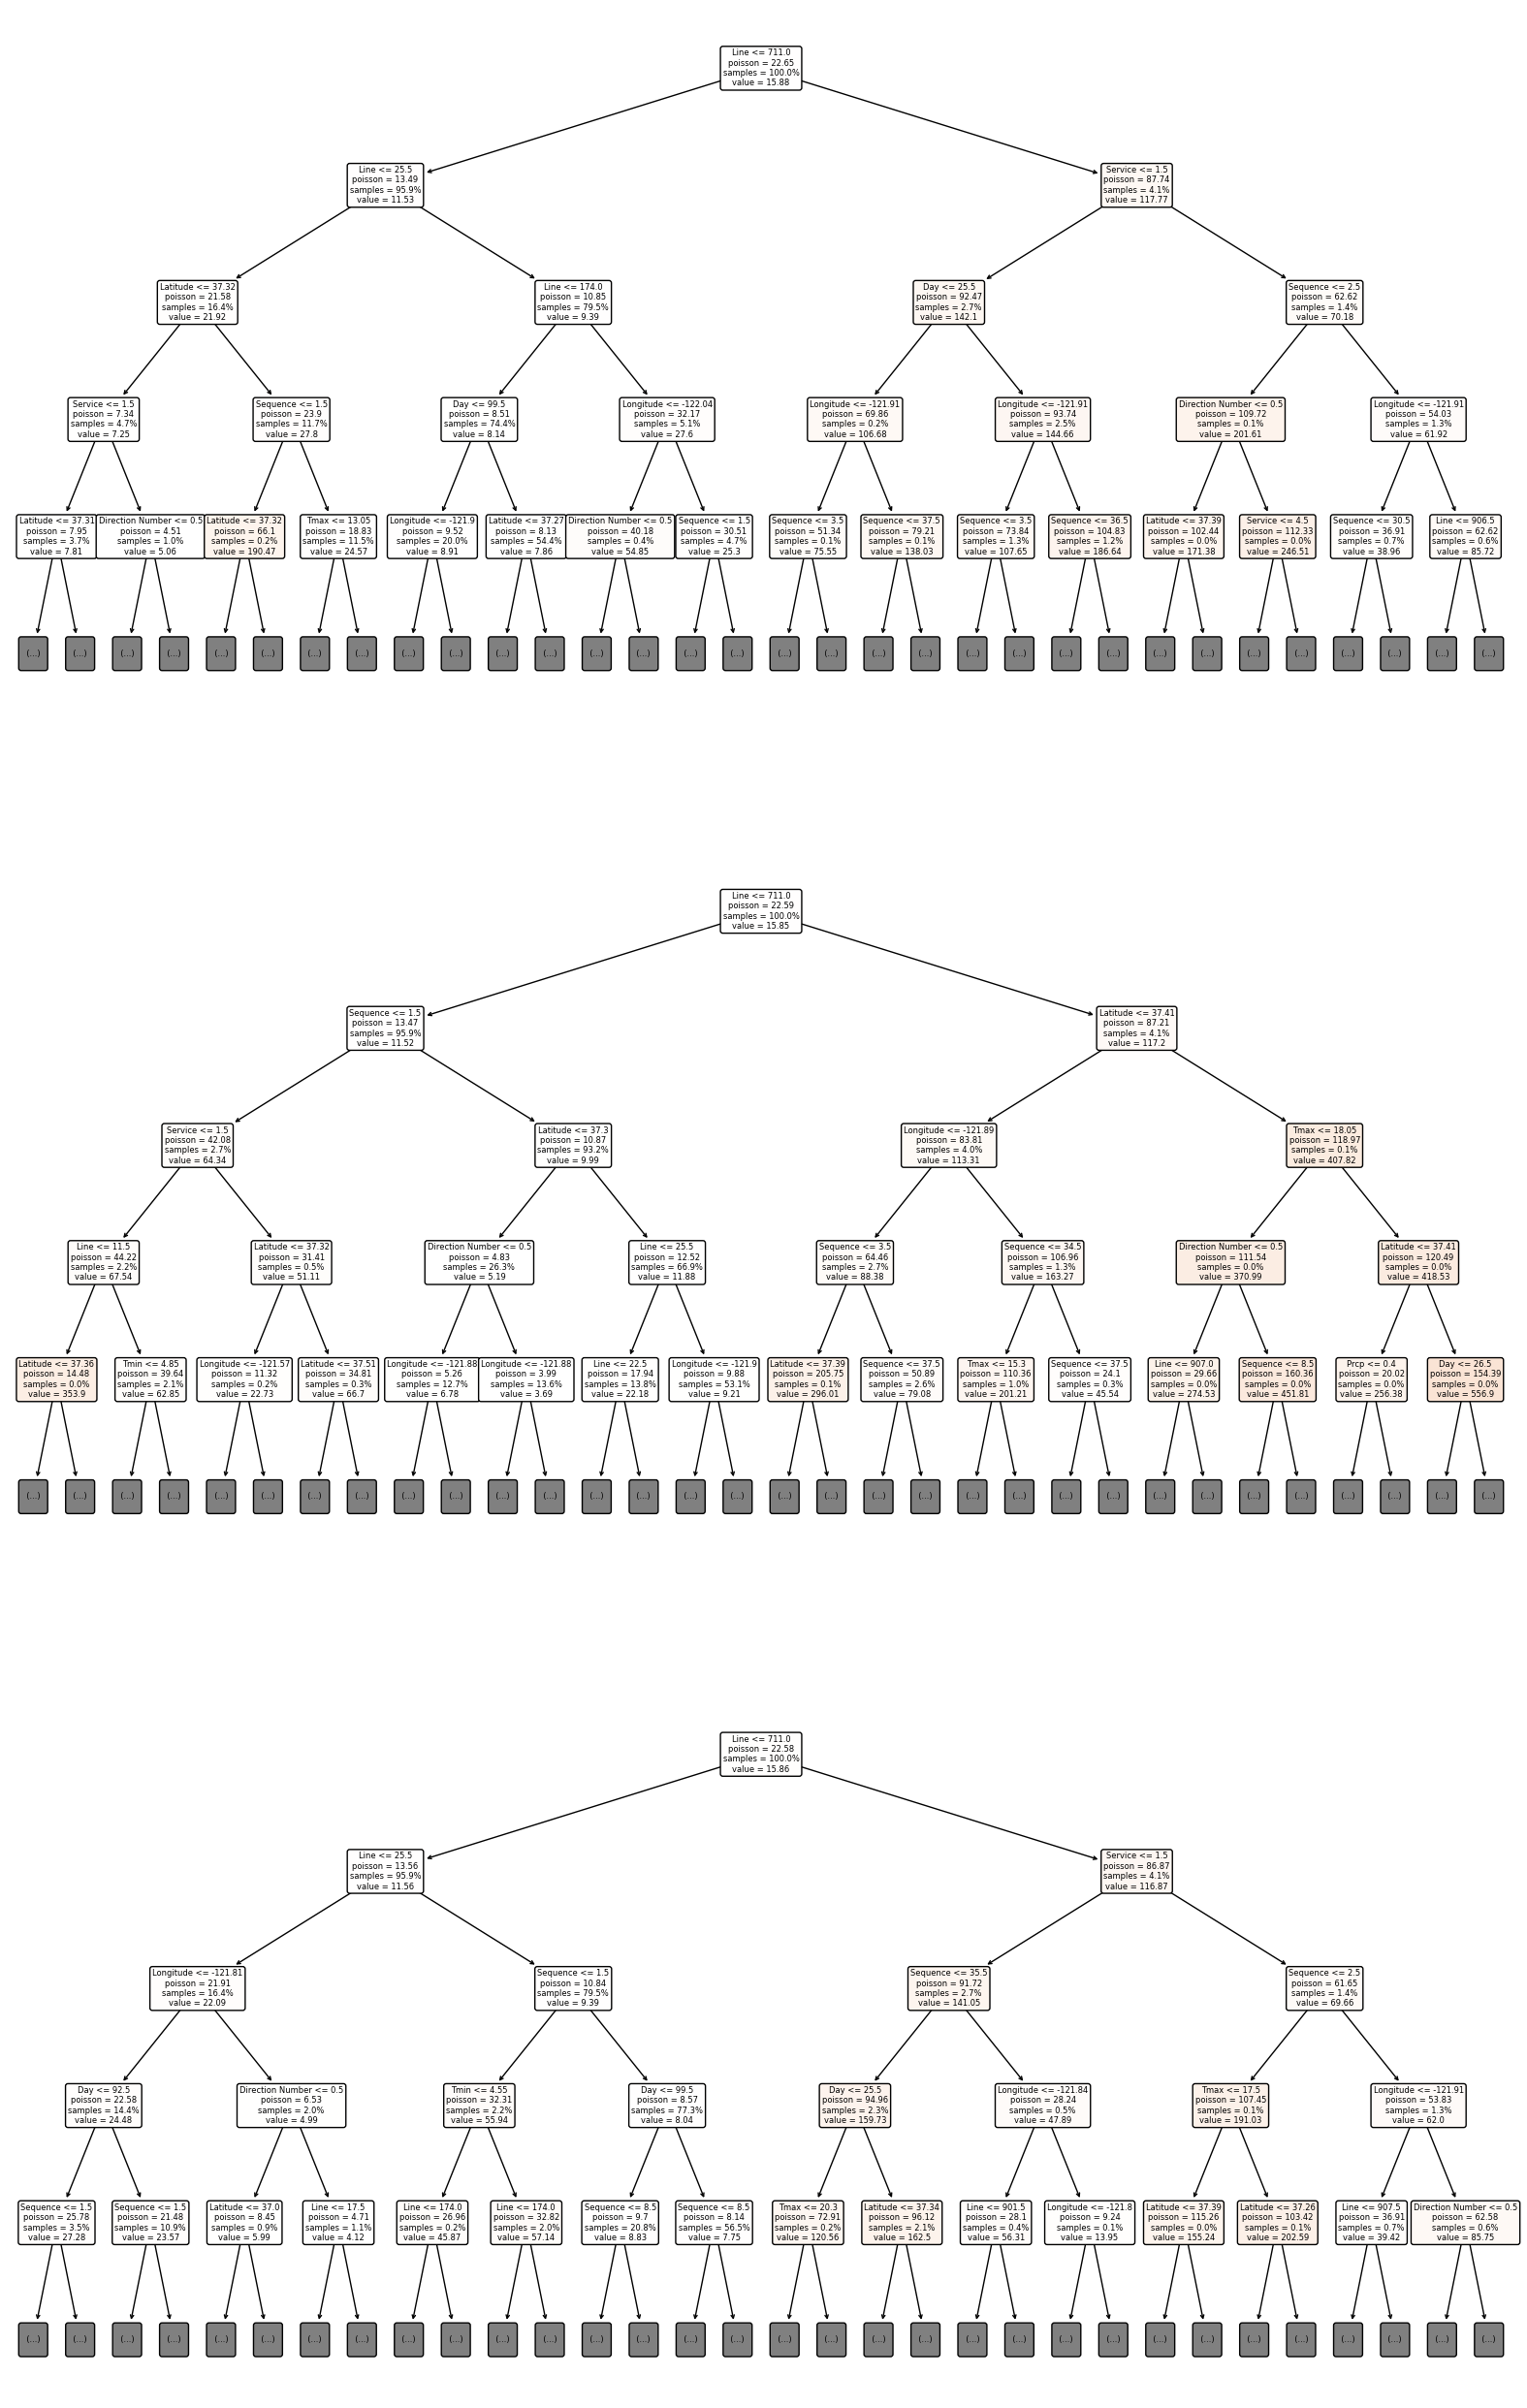

In [41]:
_, ax = plt.subplots(3, 1, figsize=(20, 32))
for i in range(3):
    _ = plot_tree(
        model.estimators_[i * len(model.estimators_) // 3],
        max_depth=4,
        feature_names=train_X.columns,
        filled=True,
        proportion=True,
        rounded=True,
        precision=2,
        fontsize=6,
        ax=ax[i],
    )

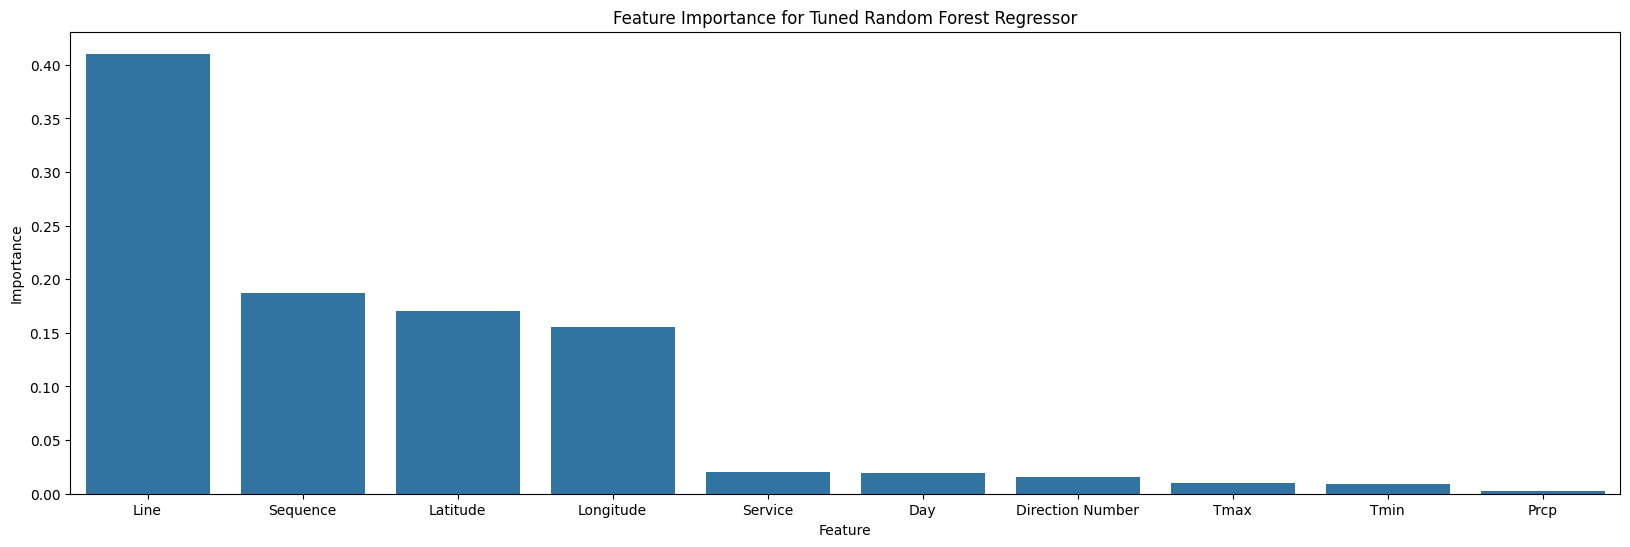

In [42]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Tuned Random Forest Regressor")

In [43]:
del model

## Gradient Boosted Trees

In [44]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "base_gbt.pkl"), "rb"))

In [45]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [46]:
model_name = "Gradient Boosted Trees"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

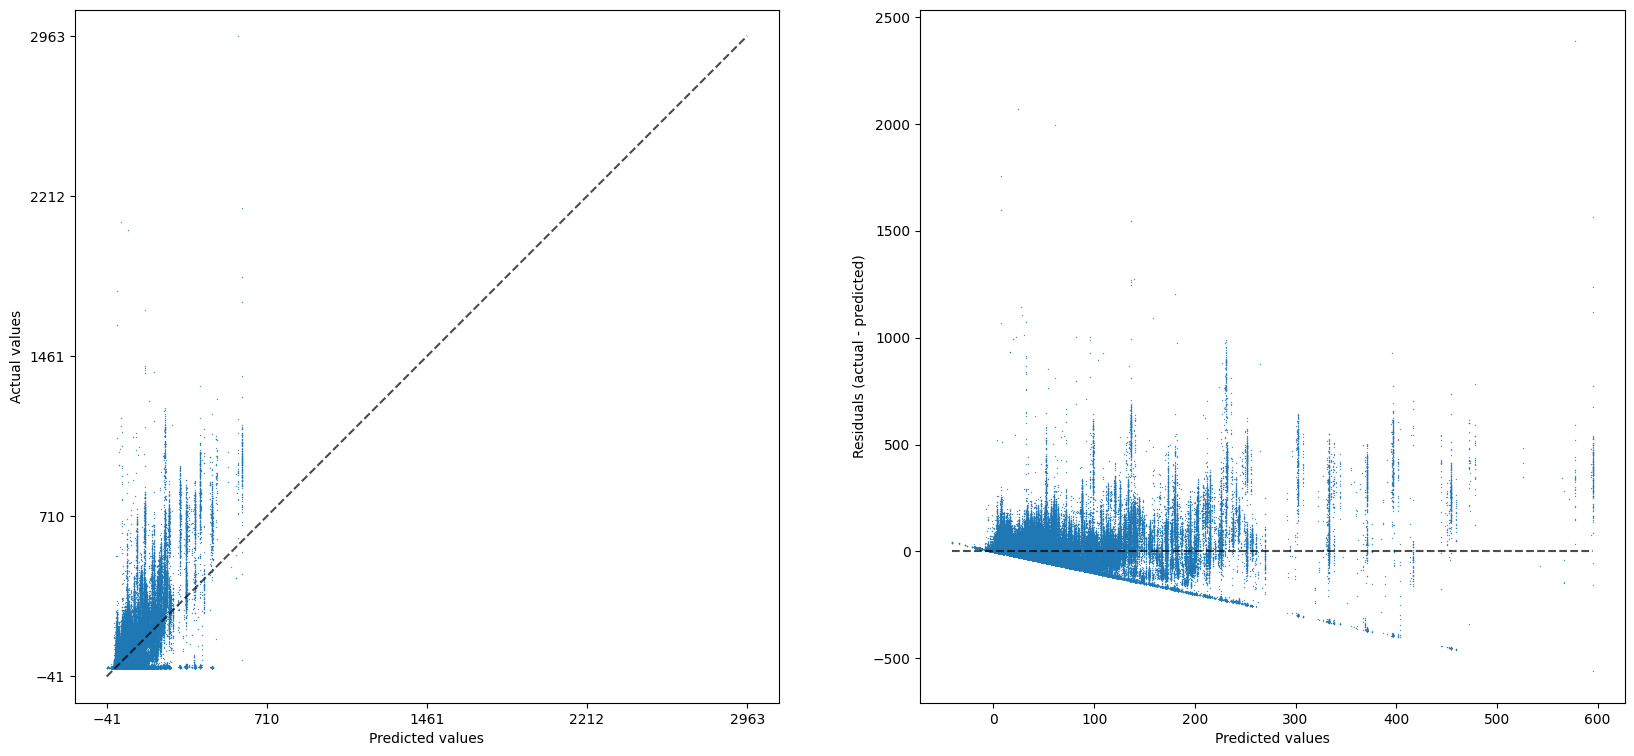

In [47]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

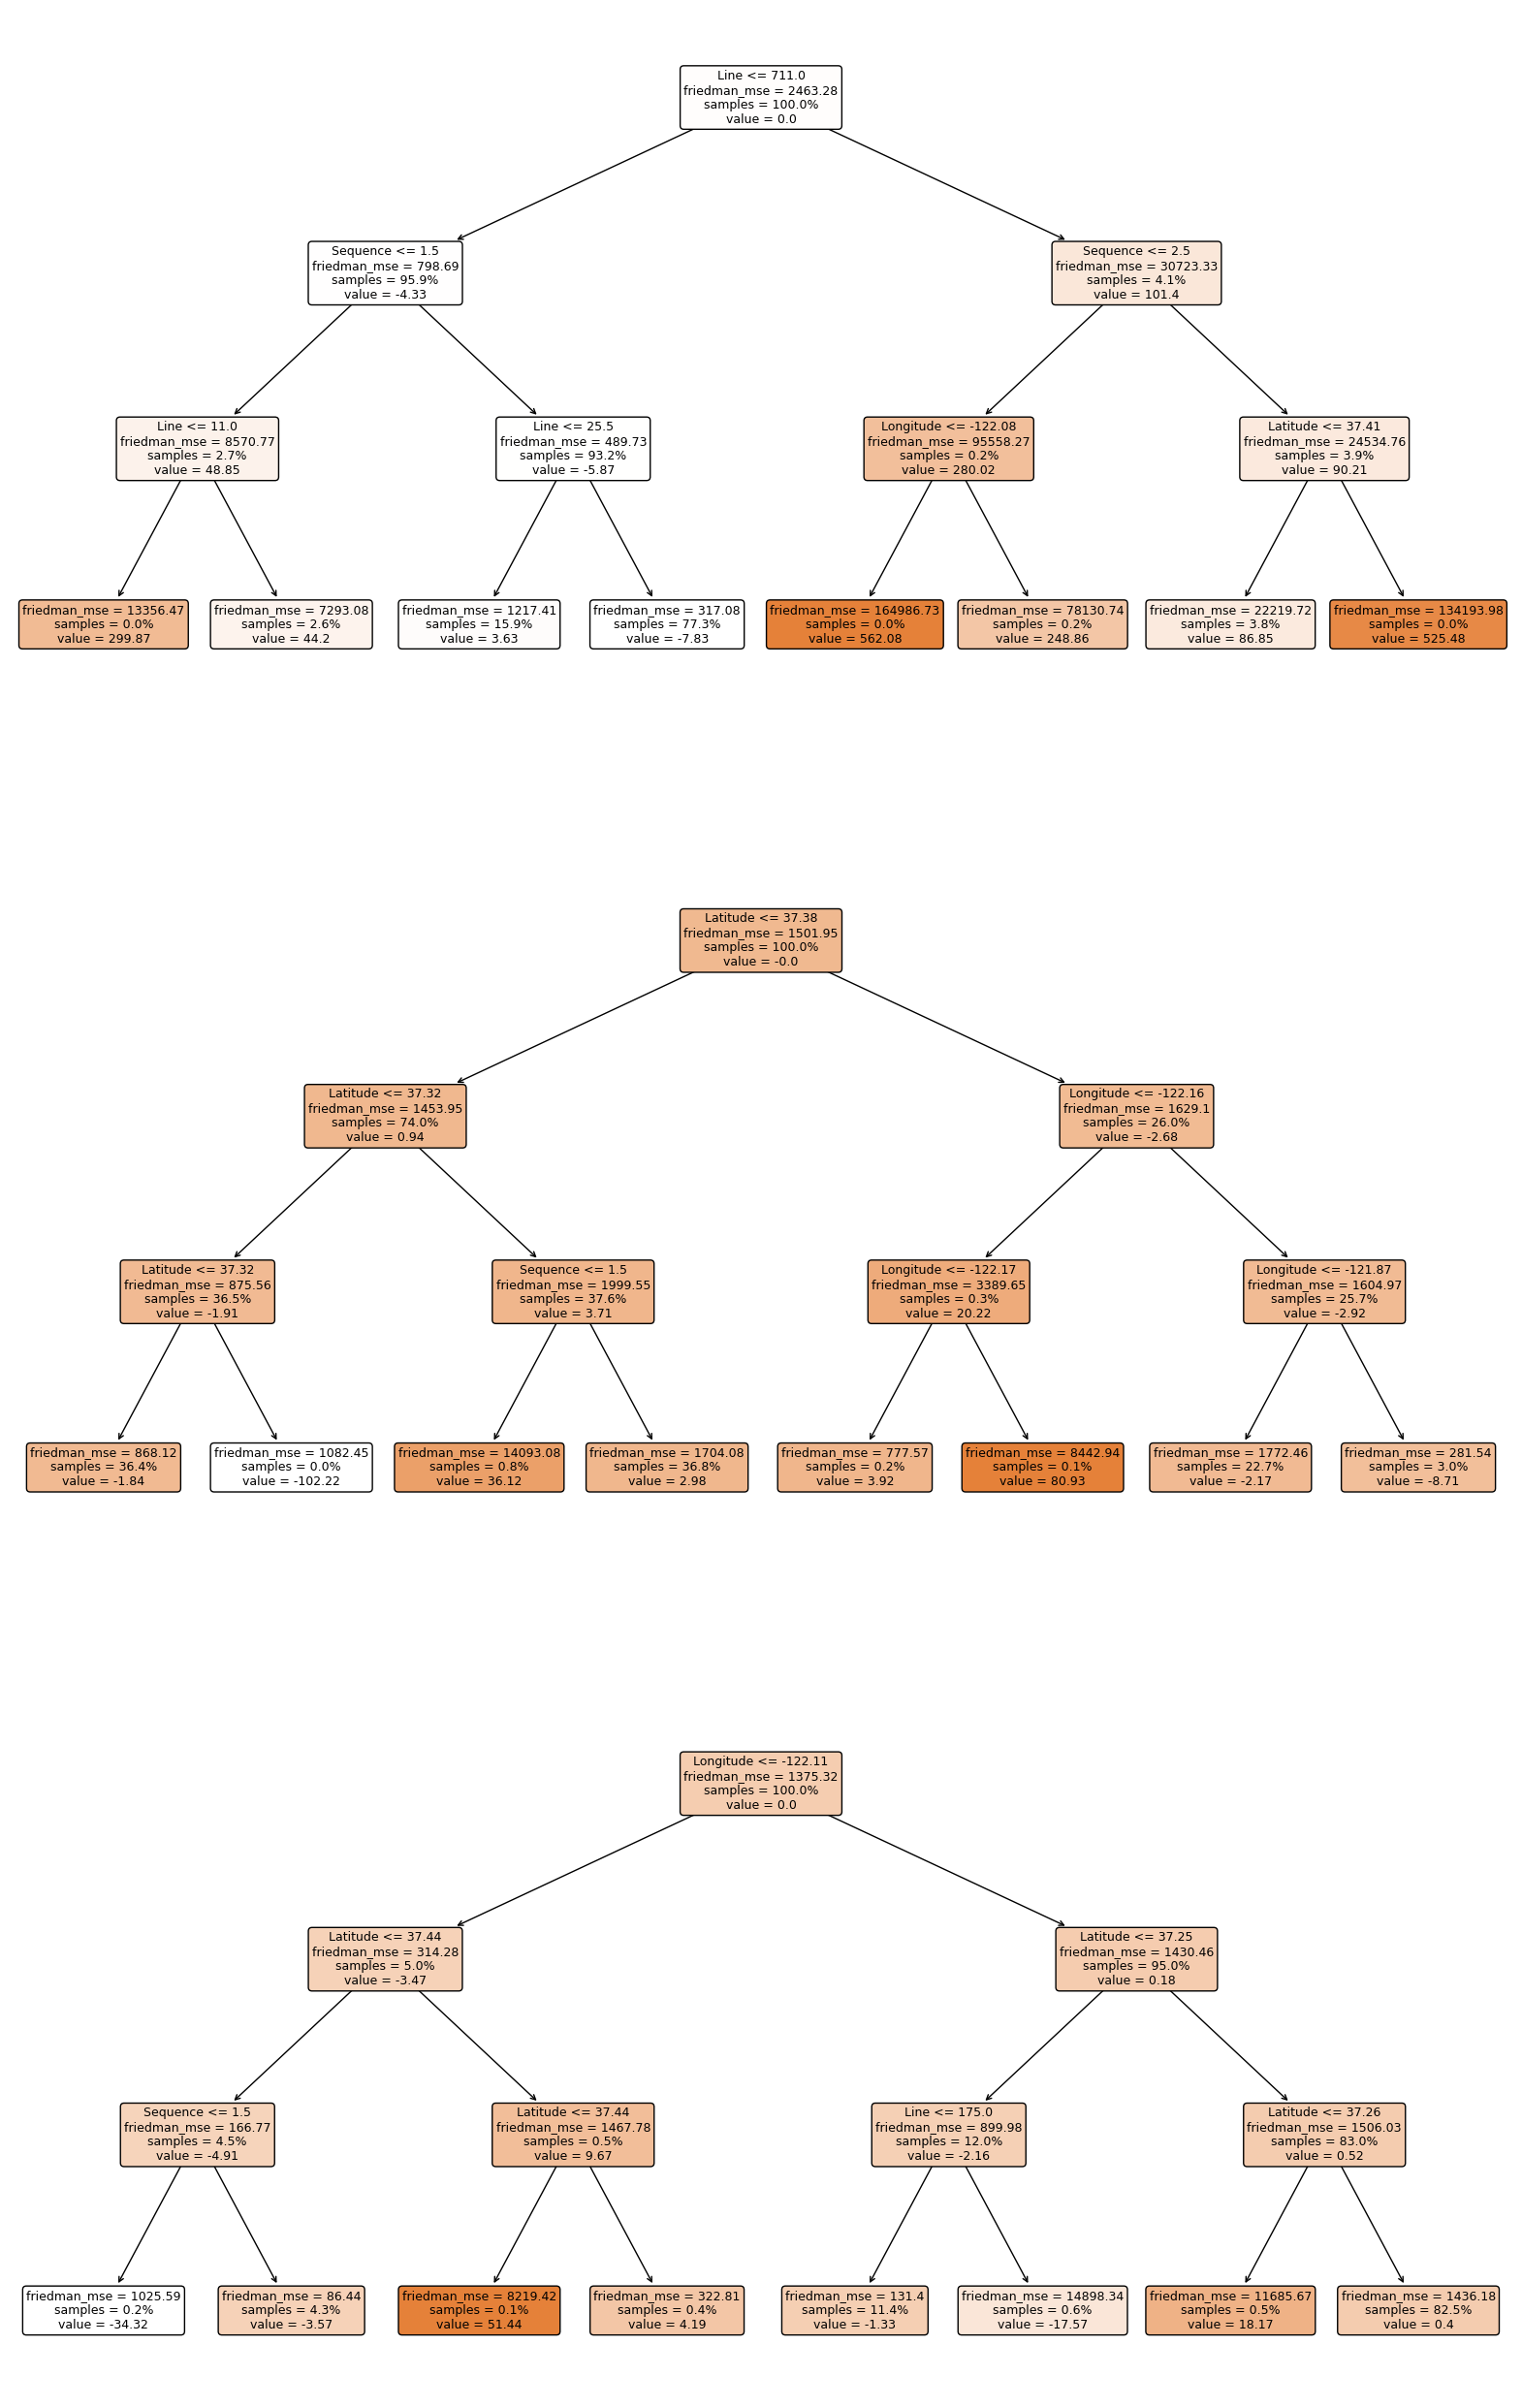

In [48]:
_, ax = plt.subplots(3, 1, figsize=(20, 32))
for i in range(3):
    _ = plot_tree(
        model.estimators_[i * len(model.estimators_) // 3][0],
        max_depth=4,
        feature_names=train_X.columns,
        filled=True,
        proportion=True,
        rounded=True,
        precision=2,
        fontsize=9,
        ax=ax[i],
    )

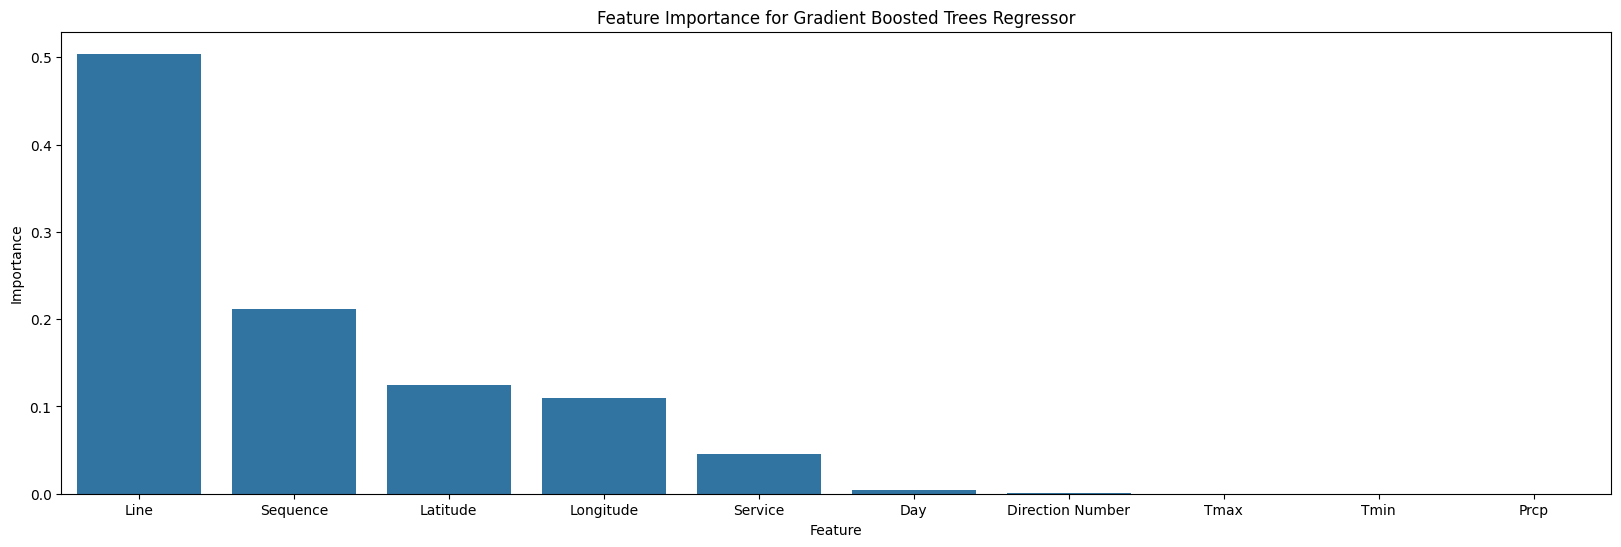

In [49]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Gradient Boosted Trees Regressor")

In [50]:
del model

## Gradient Boosted Trees (tuned)

In [51]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "tuned_gbt.pkl"), "rb"))

In [52]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [53]:
model_name = "Gradient Boosted Trees (tuned)"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

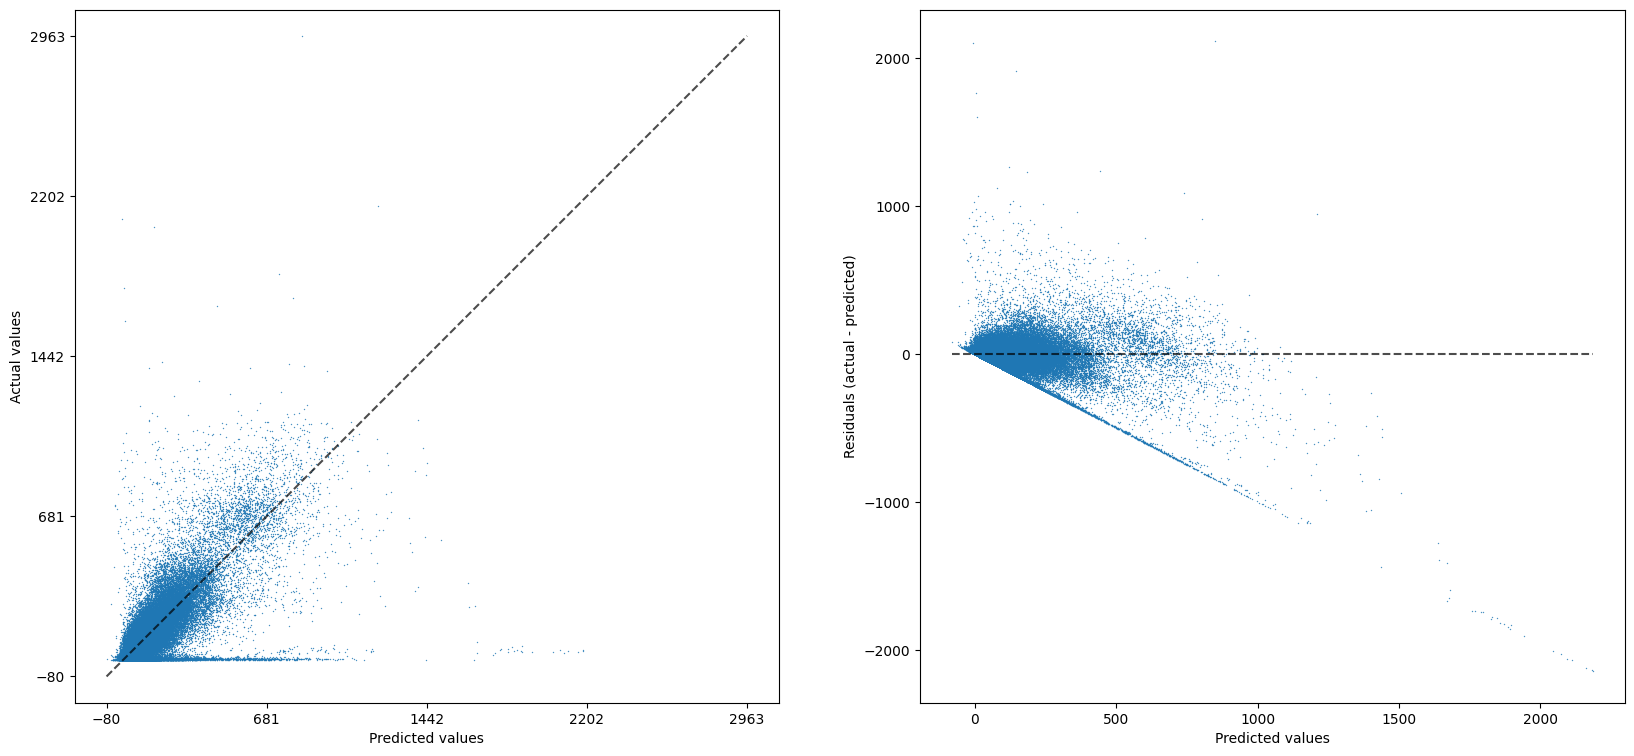

In [54]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

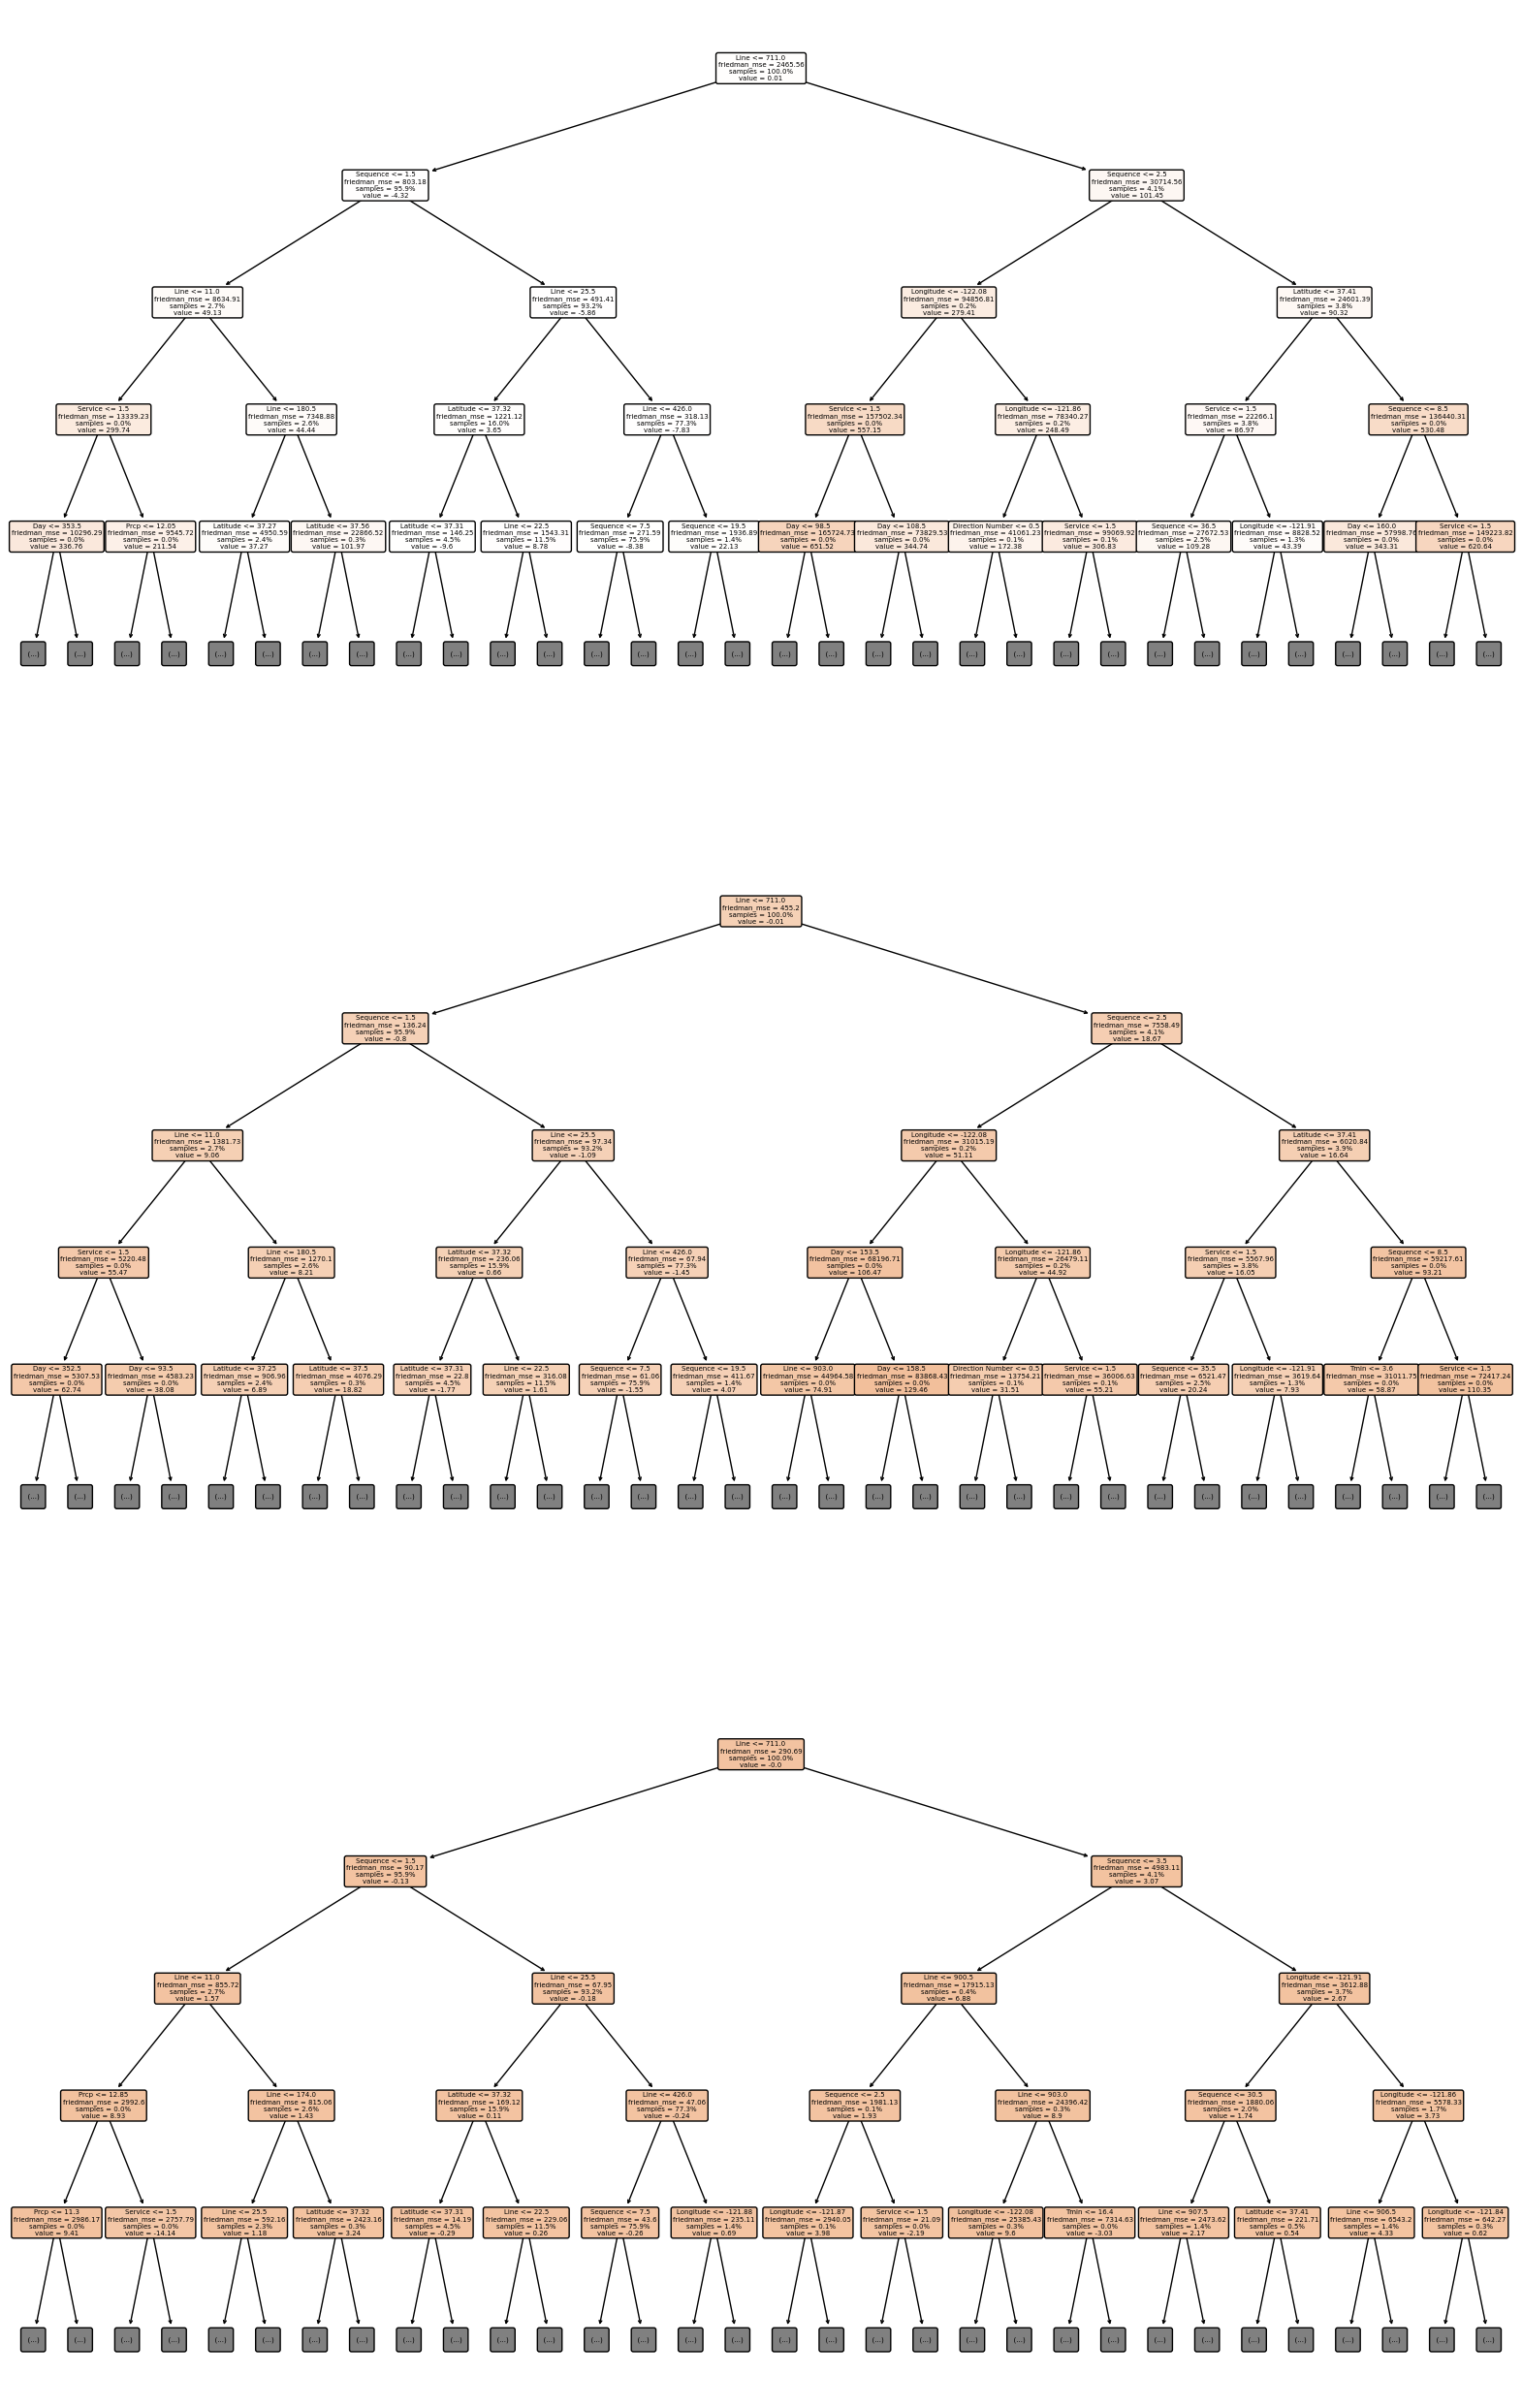

In [55]:
_, ax = plt.subplots(3, 1, figsize=(20, 32))
for i in range(3):
    _ = plot_tree(
        model.estimators_[i * len(model.estimators_) // 3][0],
        max_depth=4,
        feature_names=train_X.columns,
        filled=True,
        proportion=True,
        rounded=True,
        precision=2,
        fontsize=5,
        ax=ax[i],
    )

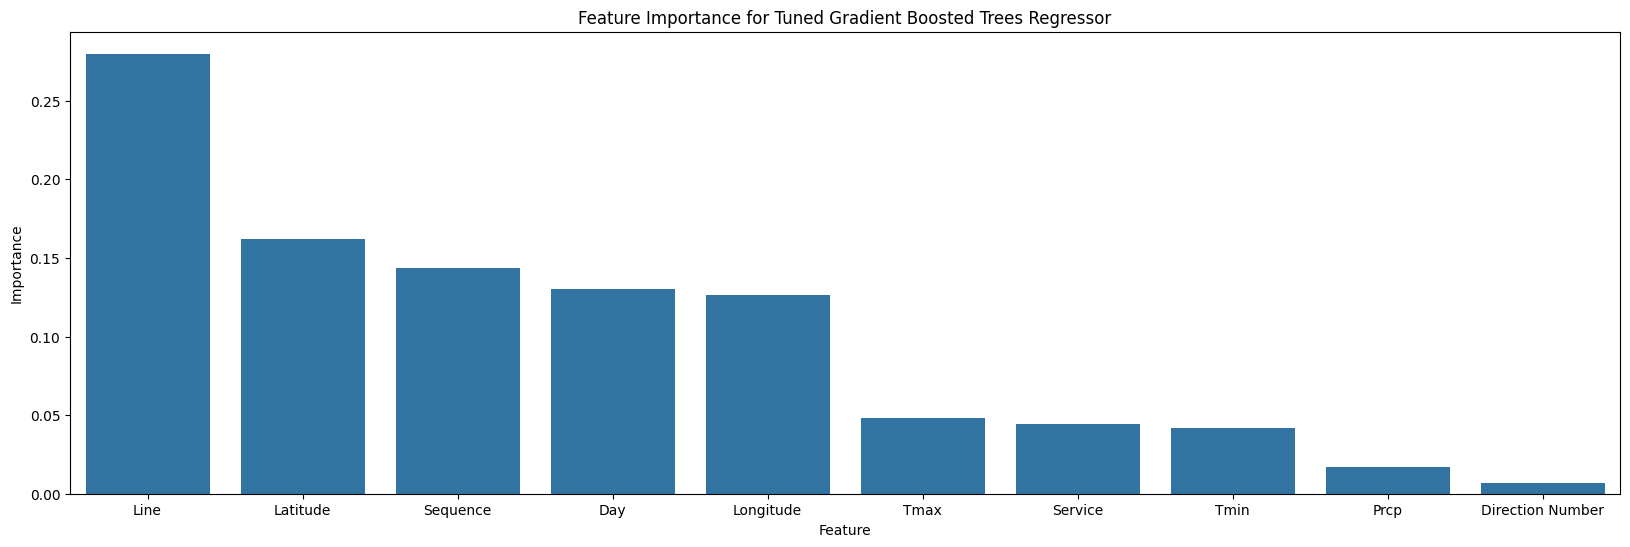

In [56]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Tuned Gradient Boosted Trees Regressor")

In [57]:
del model

## XGBoost

In [58]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "base_xgboost.pkl"), "rb"))

In [59]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [60]:
model_name = "XGBoost"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

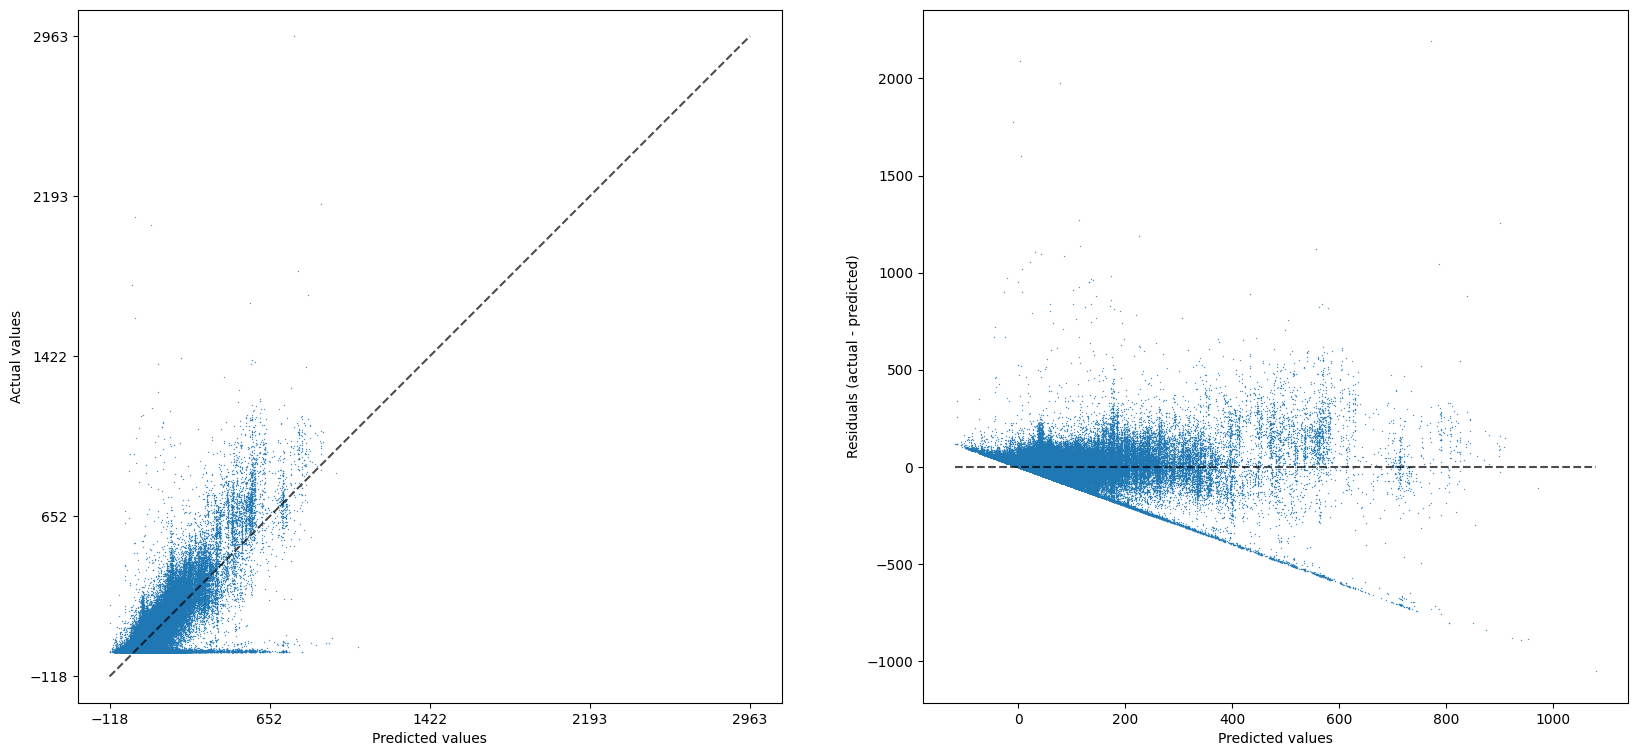

In [61]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

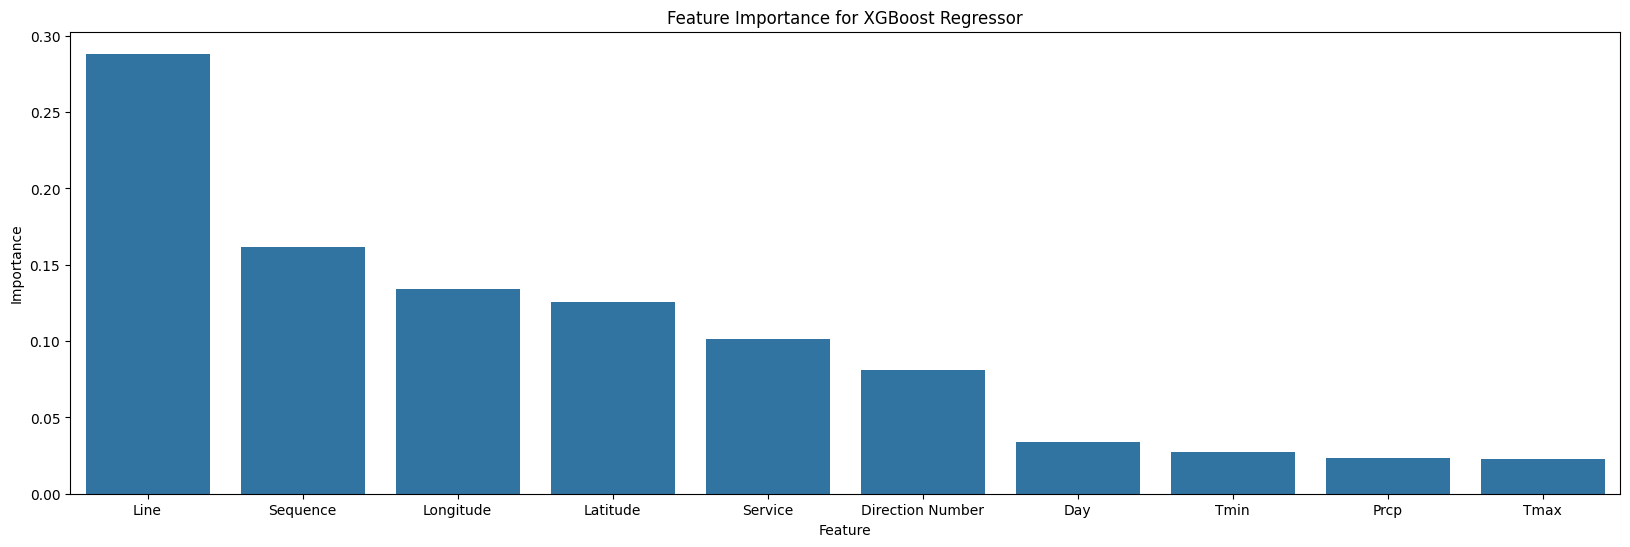

In [62]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for XGBoost Regressor")

In [63]:
del model

## XGBoost (tuned)

In [64]:
model = pickle.load(open(os.path.join(MODELS_FOLDER, "tuned_xgboost.pkl"), "rb"))

In [65]:
train_y_pred = np.floor(model.predict(train_X)).astype(int)
test_y_pred = np.floor(model.predict(test_X)).astype(int)

In [66]:
model_name = "XGBoost (tuned)"
results[("Train", "RMSE")][model_name] = root_mean_squared_error(train_y, train_y_pred)
results[("Train", "MAE")][model_name] = mean_absolute_error(train_y, train_y_pred)
results[("Train", "EVS")][model_name] = explained_variance_score(train_y, train_y_pred)
results[("Train", "R2")][model_name] = r2_score(train_y, train_y_pred)
results[("Test", "RMSE")][model_name] = root_mean_squared_error(test_y, test_y_pred)
results[("Test", "MAE")][model_name] = mean_absolute_error(test_y, test_y_pred)
results[("Test", "EVS")][model_name] = explained_variance_score(test_y, test_y_pred)
results[("Test", "R2")][model_name] = r2_score(test_y, test_y_pred)

In [67]:
_, ax = plt.subplots(1, 2, figsize=(20, 9))
display = PredictionErrorDisplay(y_true=test_y, y_pred=test_y_pred)
_ = display.plot(
    ax[0], kind="actual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)
_ = display.plot(
    ax[1], kind="residual_vs_predicted", scatter_kwargs={"linewidth": 0, "s": 1}
)

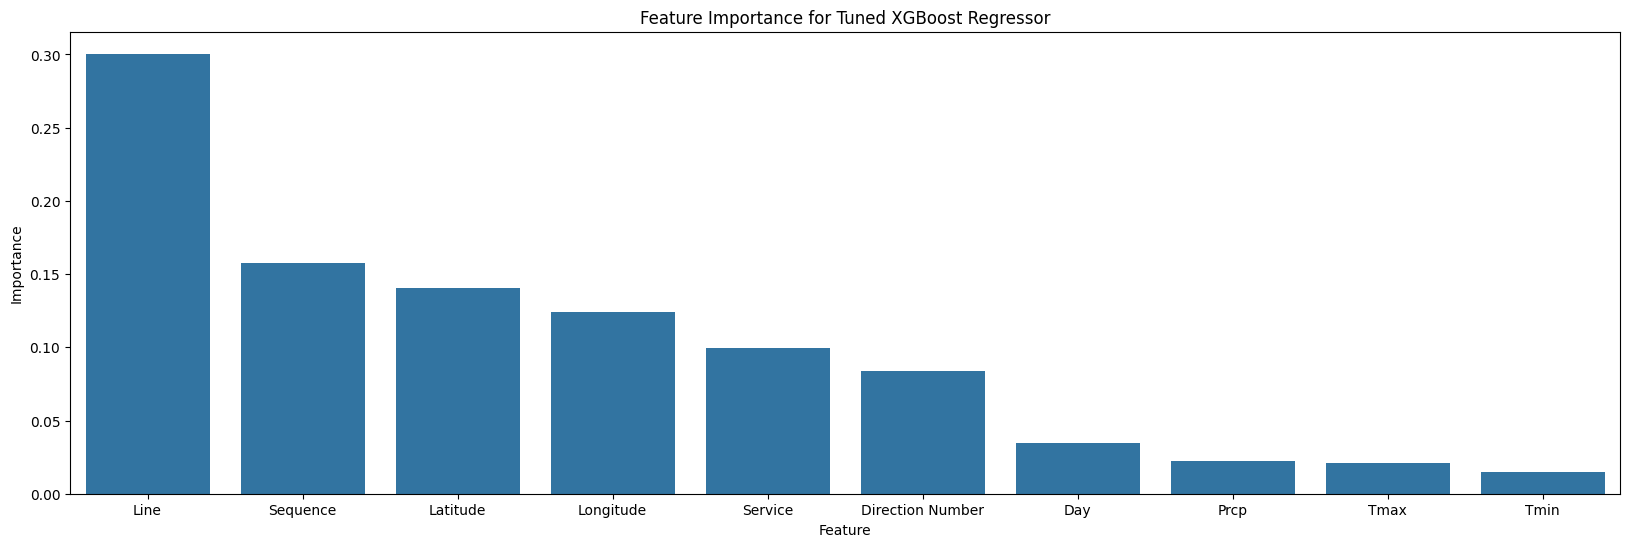

In [68]:
feat_imp = pd.DataFrame(
    {
        "Feature": [x for x in model.feature_names_in_],
        "Importance": [x for x in model.feature_importances_],
    }
)
feat_imp = feat_imp.sort_values("Importance", ascending=False)
_, ax = plt.subplots(1, 1, figsize=(20, 6))
_ = sns.barplot(feat_imp, x="Feature", y="Importance")
_ = plt.title("Feature Importance for Tuned XGBoost Regressor")

In [69]:
del model

## Results

In [70]:
pd.DataFrame(results).sort_values(("Test", "R2"), ascending=False)

Train                                 \
                                     RMSE        MAE       EVS        R2   
Random Forest (tuned)           21.921486   5.753937  0.805010  0.804914   
XGBoost                         26.297237   8.858497  0.719361  0.719259   
XGBoost (tuned)                 27.074637   9.531467  0.702517  0.702415   
Random Forest                   30.815540  10.932296  0.614610  0.614499   
Gradient Boosted Trees (tuned)  14.952138   4.751572  0.909340  0.909241   
Decision Tree (tuned)           21.516920   6.321250  0.812143  0.812049   
Gradient Boosted Trees          36.044313  12.996771  0.472675  0.472577   
Decision Tree                    4.004799   0.268897  0.993490  0.993489   
ElasticNet (tuned)              45.300691  17.420682  0.167005  0.166904   
ElasticNet                      45.784973  17.482478  0.149098  0.148996   

                                     Test                                 
                                     RMSE        MAE       EVS        R2  
Random Forest (tuned)           25.282108   7.034397  0.726423  0.726011  
XGBoost                         25.880109   9.397562  0.712901  0.712896  
XGBoost (tuned)                 26.069883   9.491517  0.708766  0.708670  
Random Forest                   28.111466  10.522375  0.661372  0.661254  
Gradient Boosted Trees (tuned)  28.511713   7.577102  0.651773  0.651540  
Decision Tree (tuned)           28.993712   7.754166  0.640138  0.639659  
Gradient Boosted Trees          32.329988  12.469461  0.552098  0.551959  
Decision Tree                   38.072360  10.010802  0.379542  0.378665  
ElasticNet (tuned)              42.781109  17.040605  0.215589  0.215468  
ElasticNet                      43.472548  17.163334  0.189971  0.189904